# Приоритизация гипотиз. Анализ результатов А/В тестирования.

# Оглавление

1. [Описание исследования](#description)
2. [Часть 1. Приоритизация гипотез](#hypothesis)
3. [Часть 2. Анализ A/B теста](#analisys)

<a id="back_to_title"></a>

На базе данных крупного интернет-магазина приоритизиру гипотезы, подготовленные отделом маркетинга для увеличения выручки. 

Кроме того , проанализирую результаты А/В-тестирования.

# Описание исследования
<a id="description"></a>

В распоряжении 2 датасета, на базе каждого из которых проведу отдельное иследование:

I) Приоритизация гипотез.

**Цель исследования** - приоритизировать 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Ход исследования** - для определения приоритетов гипотез будет использовано 2 модели: ICE и RICE. Будет проведена оценка изменения приоритетов гипотез в зависимости от используемой модели (фреймворка)

II) Анализ A/B-теста.

**Цель исследования** — выяснить, наблюдаются ли статистически значимые различия в результатах теста между группами А и В.

**Ход исследования** - Анализ А/В теста будет выполнен в соответствии со следующей этапностью:

- График кумулятивной выручки по группам. Выводы и предположения.
- График кумулятивного среднего чека по группам. Выводы и предположения.
- График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
- График кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения.
- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения.
- Точечный график количества заказов по пользователям. Выводы и предположения.
- Расчет 95-го и 99-го перцентилей количества заказов на пользователя. Установление границы для определения аномальных пользователей.
- Точечный график стоимостей заказов. Выводы и предположения.
- Расчет 95-го и 99-го перцентилей стоимости заказов. Установление границы для определения аномальных заказов.
- Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.
- Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
- Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения.
- Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
- Принятие решения по результатам теста и его объяснение. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

[К ОГЛАВЛЕНИЮ](#back_to_title)

# Часть 1. Приоритизация гипотез
<a id="hypothesis"></a>

[К ОГЛАВЛЕНИЮ](#back_to_title)

In [130]:
#импортирую все библиотеки, которые понадобятся в исследованиях
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [131]:
hypothesis = pd.read_csv('/Users/tatanakondrahina/hypothesis.csv',sep=',') #знакомимся с датасетом с гипотезами
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [132]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'] #применяю формулу ICE
pd.set_option('display.max_colwidth', None) #расширяю отображаемость колонок
display(hypothesis[['Hypothesis','ICE']].sort_values (by='ICE',ascending=False)) #вывожу на экран и сортирую 

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Согласно модели ICE, наиболее приоритетная гипотеза - Запустить акцию, дающую скидку на товар в день рождения

In [133]:
#применяю формулу RICE
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
#вывожу на экран и сортирую 
display(hypothesis[['Hypothesis','RICE']].sort_values (by='RICE',ascending=False)) 

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Согласно модели RICE, наиболее приоритетная гипотеза -  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Результаты в рамках разных фреймворков приоритизации получились неодинаковыми. Это объясняется разницей в подходах к оценке. Модель ICE не использует для оценки параметр Reach (охват) или  скольких пользователей затронет изменение, заключенное в гипотезе. 

# Часть 2. Анализ A/B-теста
<a id="analysis"></a>

[К ОГЛАВЛЕНИЮ](#back_to_title)

Построю график кумулятивной выручки

In [134]:
orders = pd.read_csv('/Users/tatanakondrahina/orders.csv', sep=',') #читаю файл
orders['date'] = pd.to_datetime(orders['date']) #перевожу столбец date в формат даты


visitors = pd.read_csv('/Users/tatanakondrahina/visitors.csv', sep=',') #читаю файл
visitors['date'] =  pd.to_datetime(visitors['date'])#перевожу столбец date в формат даты


display(orders.head(5))
display(visitors.head(5))


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Переименую столбцы таблицы orders, уберем заглавные буквы:

In [135]:
orders.columns = ('orderId','userId','date','revenue','group')

Проверю данные на пропуски и дубликаты.

In [136]:
#проверяю данные на пропуски
orders.info() 
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1197 non-null   int64         
 1   userId   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [137]:
#проверяю данные на дубликаты
display(orders.duplicated().sum()) 
display(visitors.duplicated().sum()) 


0

0

Посмотрю, сколько пользователей участвует в тесте в каждой из групп.  

In [138]:
orders.pivot_table(index='group', values='userId', aggfunc='nunique').reset_index()

,group,userId
0,A,503
1,B,586


503 пользователя в группе А и 586 пользователей в группе В. Пользователи распределены неравномерно по количеству, что может повлиять на результаты теста. 

Посмотрю, не пересекаются ли они (случаи, когда заказы одного пользователя попадают то в одну, то в другую группу теста).

In [139]:
#найду и отберу пользователей, которые встречались в двух группах
double=orders.pivot_table(index='userId',values='group', aggfunc='nunique').reset_index()
double=double.query('group>=2')
double.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 1026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   userId  58 non-null     int64
 1   group   58 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


Найдено 58 задублированных пользователя. 

In [140]:
#перевожу найденных пользователей в список, чтобы затем удалить из датасета
list_1=double['userId'].to_list()

In [141]:
orders=orders.query('userId not in @list_1')

Проверю распределение пользователей по группам после удаления задублированных пользователй. 

In [142]:
orders.pivot_table(index='group', values='userId', aggfunc='nunique').reset_index()

,group,userId
0,A,445
1,B,528


Датасеты не содержат пропусков или дубликатов. Задублированные пользователи удалены. Можно продолжать исследование.

Создам датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. 
Избавлюсь от дубликатов методом drop_duplicates()

In [143]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Объявлю переменную ordersAggregated, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

In [144]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                              .agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
                              .sort_values(by=['date','group']) 
ordersAggregated

,date,group,orderId,userId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Объявлю переменную visitorsAggregated, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

In [145]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group']) 
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Определю переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

In [146]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Объявлю переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраню данные о датах, выручке и числе заказов в группах A и B.

In [147]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

display(cumulativeRevenueA.head(5))
display(cumulativeRevenueB.head(5))

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


Построю графики кумулятивной выручки по дням по группам.

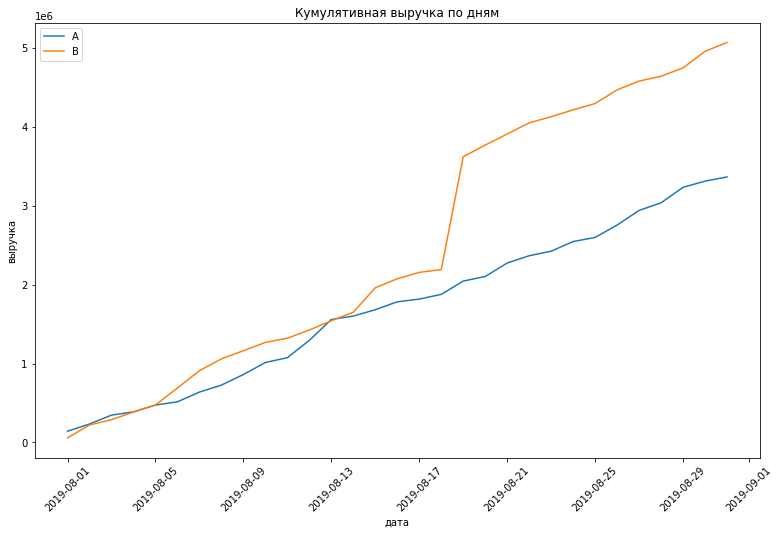

In [148]:
plt.figure (figsize=(13,8))
# Строю график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строю график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по дням')
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.ylabel('выручка')
plt.show()

Показатели выручки группы B в какой-то момент сильно начинают опережать показатели выручки группы А. Однако на графике группы B наблюдается сильный скачок в один из дней. Это может говорить о выбросах, потому выводы делать рано. Выбросы могут быть связаны как с тем , что какие-то пользователи совершают аномально крупные по стоимости покупки, так и с тем, что некоторые пользователи могут совершать аномальное количество покупок.

Для каждой группы построю графики кумулятивного среднего чека по дням.

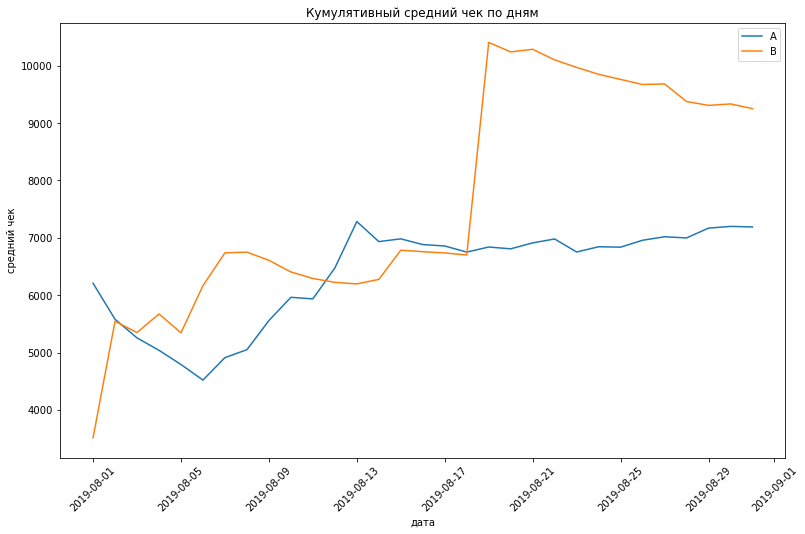

In [149]:
plt.figure (figsize=(13,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по дням')
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.ylabel('средний чек')


plt.show()

Показатели среднего чека группы B в какой-то момент также сильно начинают опережать показатели среднего чека группы А. На графике группы B, как и в случае с выручкой, наблюдается сильный скачок в один из дней. Это также может говорить о выбросах, поэтому выводы делать по-прежнему рано. Выбросы могут быть связаны как с тем , что какие-то пользователи совершают аномально крупные по стоимости покупки, так и с тем, что некоторые пользователи могут совершать аномальное количество покупок. 

Также стоит отметить, что не смотря на общее превосходство группы В в конце наблюдаемого периода график этой группы начинает стремиться вниз, в то время как группа А , кажется, переходит в плавный рост. 

Построю графики относительного различия кумулятивного среднего чека группы B к группе A.


Объединю таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. Сохраню в переменной mergedCumulativeRevenue.

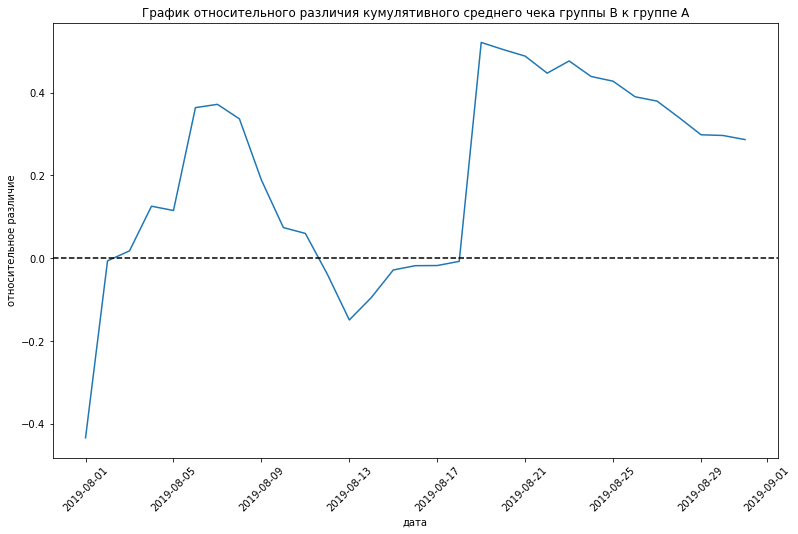

In [150]:
plt.figure (figsize=(13,8))
# собираю данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтрою отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного различия кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.ylabel('относительное различие')

plt.show()

По графику относительного различия среднего чека также видно , что группа B вышла на более высокие результаты, чем группа А. Но график достаточно нестабильный.

Пострю график кумулятивного среднего количества заказов на посетителя по группам 



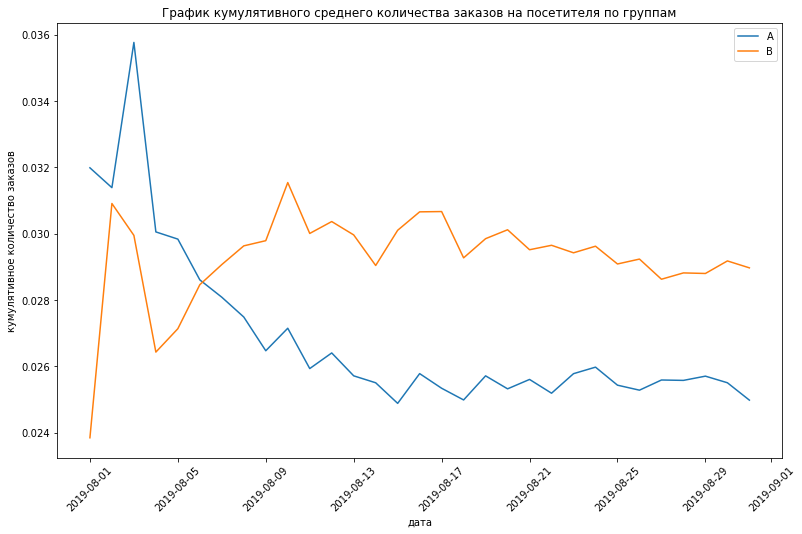

In [151]:
plt.figure (figsize=(13,8))
# считаю кумулятивное количество заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяю данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяю данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строю графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.ylabel('кумулятивное количество заказов')
plt.show()

Количество заказов по группе B вышло на более высокий уровень и стабилизировалось.

Построю график относительного различия кумулятивного количества заказов группы B к группе A.

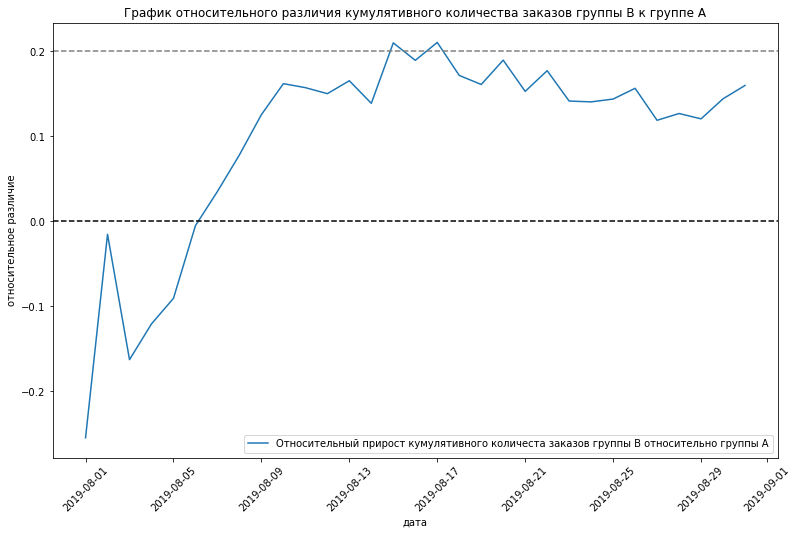

In [152]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure (figsize=(13,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного количеста заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного различия кумулятивного количества заказов группы B к группе A')
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.ylabel('относительное различие')
plt.show()

По графику относительного различия кумулятивного количества заказов таже видно значительно более высокий показатель группы В по сравнению с группой А. 

Построю точечный график количества заказов по пользователям. 

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


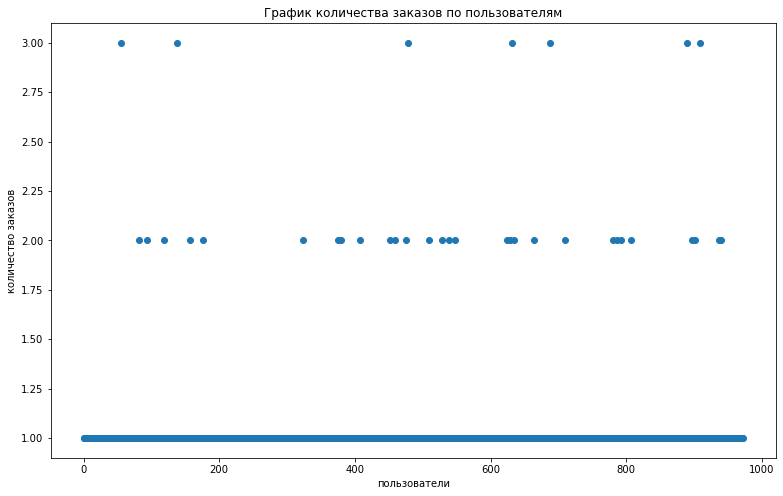

In [153]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure (figsize=(13,8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('количество заказов')
plt.show()

Основная часть посетителей делаеn 1 покупку. Но 2, 3 и 4 покупки также совершаются достаточно часто. 

Однако для того чтобы убедиться, сколько точно покупок являются выбросами посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберу границу для определения аномальных пользователей.

In [154]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% заказов в количестве 2 и не более 1% заказов в количестве 4. Возьму 2 заказа на одного пользователя за верхнюю границу числа заказов.

Построю точечный график стоимостей заказов. 

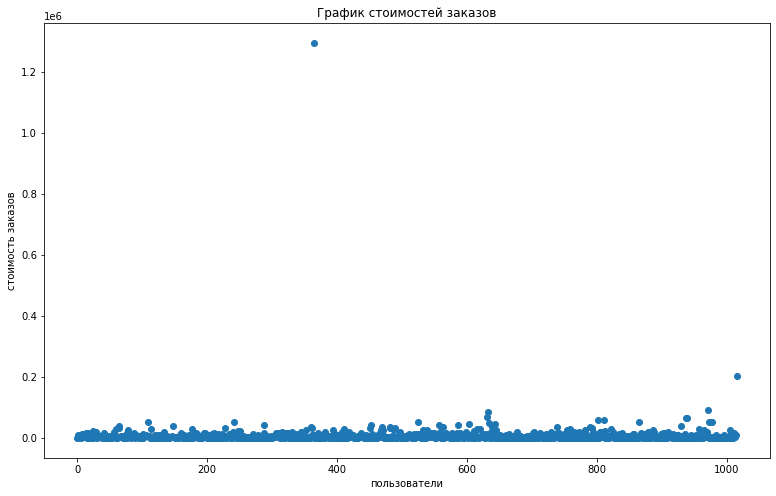

In [155]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure (figsize=(13,8))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('пользователи')
plt.ylabel('стоимость заказов')
plt.show()

Из-за двух выбросов график стал неинформативным. Cделаю еще один график без выбросов.

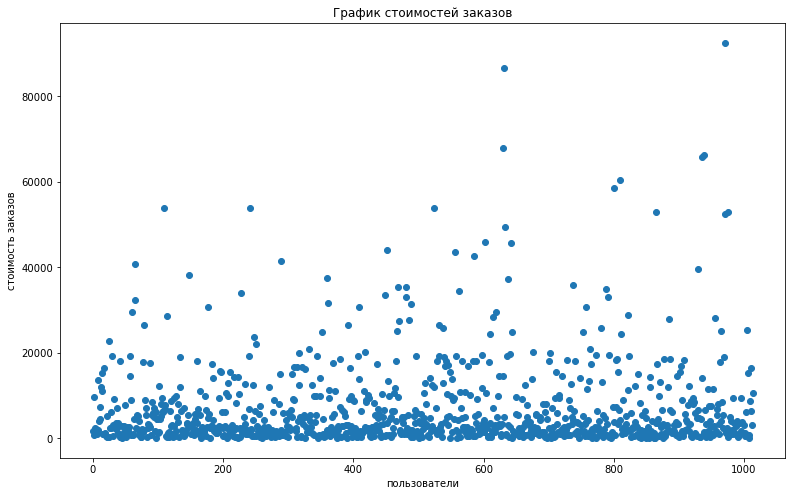

In [156]:
orders_1=orders.query('revenue<100000')

x_values = pd.Series(range(0, len(orders_1['revenue'])))
plt.figure (figsize=(13,8))
plt.scatter(x_values, orders_1['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('пользователи')
plt.ylabel('стоимость заказов')
plt.show()

Из уточненного графика картина становится яснее. Верхняя граница стоимости заказа находится в районе 20000. 
Расчитаю перцентили для более ясного понимания.

Посчитаю  95-й и 99-й перцентили стоимости заказов. Выберу границу для определения аномальных заказов.

In [157]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% заказов со стоимостью 26785 и не более 1% заказов со стоимостью 53904. Возьму стоимость заказа 27000 за верхнюю границу числа заказов.

Посчитаю статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным.


Сформулируюгипотезы. Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Значение  alpha примем за 5%.

Подготовлю данные:

In [158]:
#количество пользователей в выбранную дату в группе A

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#количество заказов и выручка в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#количество заказов и выручка в выбранную дату в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создам переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов

In [159]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


Объявлю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [160]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

display("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("Относительный выигрыш группы B = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'p-value = 0.01102'

'Относительный выигрыш группы B = 0.160'

p-value 0,011 (меньше 0,05). Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаю. Относительный выигрыш группы B равен 16% — второе число в выводе. По «сырым» данным различия в среднем числе заказов групп A и B есть.

Теперь проверю статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [161]:
display('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('Относительный выигрыш группы B = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-value = 0.829'

'Относительный выигрыш группы B = 0.287'

P-value значительно больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A (28,7%)

Таким образом, различий в среднем чеке заказа между группами А и В нет, а наблюдаемое превышение среднего чека группы В на 28,7% не является значимым, получено случайно

Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя а также в среднем чеке  между группами по «очищенным» данным. Ранее мы расчитали 95й и 99й перцентили, которые составили 2 и 4 для количества заказов. Взяла количество заказов в размере 2 в качестве верхней границы числа заказов .
Для среднего чека 95й и 99й перцентили составили  26785 и 53904. Взяла стоимость заказа 27000 за верхнюю границу числа заказов.

Сделаю срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 27 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [162]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95])[0]]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) #считаю количество аномальных пользователей

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: userId, dtype: int64

58

Всего 58 аномальных пользователя.
Узнаю, как их действия повлияли на результаты теста. 

Посчитаю статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «очищенным» данным.
Сформулирую гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Значение  alpha примем за 5%.

In [163]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('p-value = {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('Относительный выигрыш группы B = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'p-value = 0.01235'

'Относительный выигрыш группы B = 0.182'

Результаты по среднему количеству заказов для очищенных данных несколько изменились. p-value был 0,011 (стал 0,012). Относительный выигрыш группы B был 16% стал 18,2%. Но в целом на общий вывод это не повлияло: нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаю. Группа В показала результат значительно лучше.  Произошло ли что-нибудь с результатами по среднему чеку? Проверю: 

In [164]:
display(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "Относительный выигрыш группы B = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)




'p-value = 0.646'

'Относительный выигрыш группы B = -0.048'

P-value по-прежнему значительно больше 0,05 и составил 0,646 (был 0,829). Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Различий нет. Однако относительная разница между сегментами стала -4.8% (была 28,7%). Это значит, что группа А превосходит группу В на 4.8%, а до этого группа В была выше на целых 28,7% - аномальные данные влияли на результат.

Выводы:

Количество заказов. Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаю и по сырым и по очищенным данным . График различия количества заказов между группами, построенный ранее, также сообщает, что результаты группы B лучше группы A.

Средний чек. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет ни по сырым ни по очищенным данным.Различий нет. По графику относительного различия среднего чека ранее было видно , что группа B вышла на более высокие результаты, чем группа А, но данные были неочищенные , а график нестабильный, поэтому по нему и нельзя было делать какого-либо вывода.

Таким образом, победила группа В - количество заказов по ней выше, хоть средний чек и не отличается от группы А. При одинаковых средних чеках и бОльшему количеству заказов группы В выручка в этой группе тоже будет выше.

Тест следует остановить и признать его успешным.

[К ОГЛАВЛЕНИЮ](#back_to_title)